In [283]:
## This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier 
from sklearn import metrics
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.metrics import classification_report, confusion_matrix
import csv
from sklearn.model_selection import train_test_split

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

#import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
    #for filename in filenames:
        #print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [284]:
#Get the data given to us
#training_file = pd.read_csv('../input/cap-4611-spring-21-assignment-1/train.csv')
#test_file = pd.read_csv('../input/cap-4611-spring-21-assignment-1/test.csv')

training_file = pd.read_csv("train.csv")
test_file = pd.read_csv("test.csv")

data_file = training_file.copy()

data_file.drop('id', axis =1 , inplace = True)
test_file.drop('id', axis =1 , inplace = True)


In [285]:
#Lets see how the data is 

data_file.head()

,Bankrupt,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,operating gross margin,realized sales gross margin,operating profit rate,tax Pre-net interest rate,after-tax net interest rate,non-industry income and expenditure/revenue,...,net income to total assets,total assets to GNP price,No-credit interval,Gross profit to Sales,Net income to stockholder's Equity,liability to equity,Degree of financial leverage (DFL),Interest coverage ratio( Interest expense to EBIT ),one if net income was negative for the last two year zero otherwise,equity to liability
0,0,0.647346,0.683820,0.667273,0.610069,0.610069,0.999181,0.797708,0.809538,0.303639,...,0.845906,0.001164,0.624779,0.610068,0.843976,0.279420,0.026798,0.565193,1,0.030658
1,0,0.495247,0.555768,0.544997,0.600600,0.600600,0.999018,0.797449,0.809356,0.303526,...,0.805535,0.006289,0.622790,0.600600,0.840984,0.282245,0.027232,0.566643,1,0.023030
2,0,0.493248,0.544865,0.544890,0.605810,0.605810,0.999011,0.797454,0.809376,0.303549,...,0.803692,0.002246,0.624613,0.605807,0.840458,0.275849,0.026794,0.565171,1,0.093123
3,0,0.315117,0.364261,0.352910,0.619366,0.619366,0.997875,0.795752,0.807775,0.302952,...,0.713786,0.000459,0.623901,0.619363,0.835870,0.275382,0.026774,0.565073,1,0.148308
4,0,0.526642,0.590547,0.578350,0.612866,0.612866,0.999036,0.797590,0.809484,0.303735,...,0.826240,0.000556,0.624134,0.612867,0.841919,0.277004,0.026791,0.565158,1,0.051906


In [286]:
#we dont actually have a use for the Id file so we can just drop that one

#Now for get the X and Y features that represent the data that Im looking for
#in this case we are looking for the bankrupt part

X_train = data_file.loc[:,data_file.columns!='Bankrupt']
y_train = data_file.loc[:,'Bankrupt']



(array([3.107e+03, 2.440e+02, 3.600e+01, 9.000e+00, 4.000e+00, 5.000e+00,
        0.000e+00, 2.000e+00, 2.000e+00, 1.000e+00]),
 array([0.        , 0.09206381, 0.18412763, 0.27619144, 0.36825526,
        0.46031907, 0.55238289, 0.6444467 , 0.73651052, 0.82857433,
        0.92063815]),
 <BarContainer object of 10 artists>)

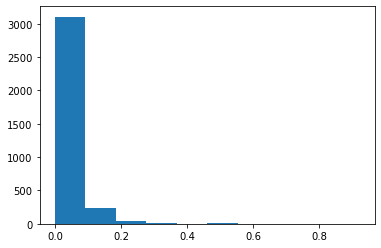

In [287]:
#Now lets see how the actual data is represented 

#On a Hist Chart 
#This chart would say that the data is actually very uniform and doesnt have that many outliers
plt.hist(data_file.iloc[:,-1])

<AxesSubplot:>

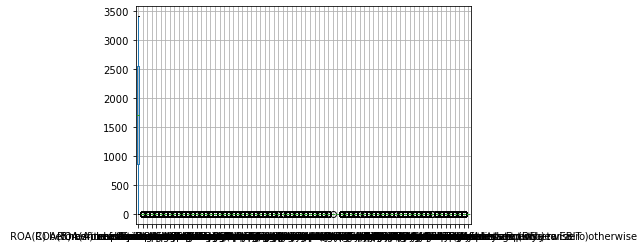

In [288]:
#but lets see another type of chart that clearly would represent the outliers 

training_describe_std = training_file.describe().loc['std',:]
ex_coles = training_describe_std[training_describe_std>10000].index.values
regular_coles =[col for col in training_file.columns[:-1] if col not in ex_coles]

#Now make this into a boxplot
#and we can clearly see that we dont have any outliers in the data as they would appear out of the line 
training_file.loc[:,regular_coles].boxplot()

In [289]:
#checking for any NULL values in the data

df = pd.DataFrame(data_file)
count = len(df.notnull())
real = len(data_file)

print('There are ' + str(count) + ' out of ' + str(real) + ' features in this CSV file!')

There are 3410 out of 3410 features in this CSV file!


In [297]:
#Begin Decision tree model

dTree = DecisionTreeClassifier(criterion= 'entropy', max_depth=7)
dTree.fit(X_train, y_train)

dTreePredict = dTree.predict_proba(test_file)


F1 Score: 0.7326732673267325
AUC Score: 0.8336363636363637
Accuracy Score: 0.9841642228739003

[[3282   18]
 [  36   74]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3300
           1       0.80      0.67      0.73       110

    accuracy                           0.98      3410
   macro avg       0.90      0.83      0.86      3410
weighted avg       0.98      0.98      0.98      3410


Submitting Results...
Submission complete!


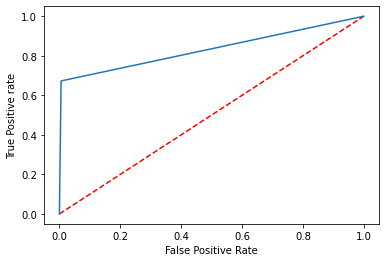

In [300]:
#Scores and confusion matrix for the decision tree model

Xtrain_predict = dTree.predict(X_train)

print('F1 Score: ' + str(metrics.f1_score(y_train, Xtrain_predict)))
print('AUC Score: ' + str(metrics.roc_auc_score(y_train, Xtrain_predict)))
print('Accuracy Score: ' + str(metrics.accuracy_score(y_train, Xtrain_predict)))

#Matrix
print()
print(confusion_matrix(y_train, Xtrain_predict))
print(classification_report(y_train, Xtrain_predict))

#make a chart representing the ROC Curve
fpr, tpr, _ =metrics.roc_curve(y_train, Xtrain_predict)
aucChart1 = metrics.roc_auc_score(y_train, Xtrain_predict)
plt.plot([0,1], [0,1], 'r--')
plt.plot(fpr, tpr, label = 'AUC for Chart = %0.3f' %aucChart1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend


#submit
print()
print("Submitting Results...")
output = pd.DataFrame({'Bankrupt' : dTreePredict[:,1]})
output.to_csv('DecisionTree_Prediction.csv', index=True, index_label = 'id')
print("Submission complete!")

In [292]:
#Begin Random Forest model

rForest = RandomForestClassifier(criterion= 'entropy', max_depth=8, verbose = 2)
rForest.fit(X_train, y_train)

rForest_predict = rForest.predict_proba(test_file)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building

F1 Score: 0.9622641509433962
AUC Score: 0.9636363636363636
Accuracy Score: 0.9976539589442815

[[3300    0]
 [   8  102]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3300
           1       0.86      0.71      0.78       110

    accuracy                           0.99      3410
   macro avg       0.92      0.85      0.88      3410
weighted avg       0.99      0.99      0.99      3410


Submitting Results... 
Submission complete!
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


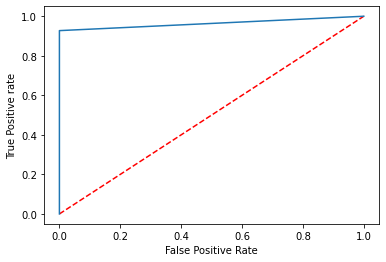

In [293]:
#Scores and confusion matrix for the decision tree model

forestPredict = rForest.predict(X_train)

print('F1 Score: ' + str(metrics.f1_score(y_train, forestPredict)))
print('AUC Score: ' + str(metrics.roc_auc_score(y_train, forestPredict))) 
print('Accuracy Score: ' + str(metrics.accuracy_score(y_train, forestPredict)))


#print matrix
print() 
print(confusion_matrix(y_train, forestPredict))

print(classification_report(y_train, Xtrain_predict))

#make a chart representing the ROC Curve
fpr, tpr, _ =metrics.roc_curve(y_train, forestPredict)
aucChart1 = metrics.roc_auc_score(y_train, forestPredict)
plt.plot([0,1], [0,1], 'r--')
plt.plot(fpr, tpr, label = 'AUC for Chart = %0.3f' %aucChart1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend


#submit
print()
print("Submitting Results... ")
output = pd.DataFrame({'Bankrupt' : rForest_predict[:,1]}) 
output.to_csv('RandomForest_Prediction.csv', index=True, index_label = 'id')
print("Submission complete!")

In [294]:
print('Done!')

Done!
